# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [2]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

# from sklearn.datasets import fetch_mldata

## Data

In [3]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True,normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore you can do the following:
  - Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.
  
Hopefully, this implementation of a neural network is clear after your investigation. You should be able to answer following questions:
  - Which cost function is used, what is its derivation and how is it implemented?
  - Why are the boundaries of your plot between [-1,0]
  - why it is so noisy, how do you can reduce the noice 
  - and what is the difference to a usual plot of a loss function?
  - How does the network implement the backpropagation algorithm?

In [4]:
# https://brilliant.org/wiki/backpropagation/
# https://stats.stackexchangecom/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

0 0.9412
1 0.9558
2 0.9629
3 0.967
4 0.9695
5 0.9701
6 0.9714
7 0.9717
8 0.9724
9 0.9733


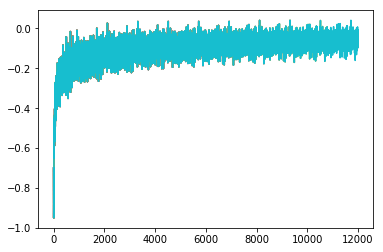

In [11]:
delta_hist =[]

# 784 input, 200 hidden layer neurons >> H1, H2 = 100, out = 10
# 3 layer net
layers = [(784, 200), (200,100), (100, 10)]

# sigma (X * W) = activation
def feed_forward(X, weights):
    a = [X]
        
    # max() activation function
    # rectified linear ReLU have derivative 0 or ct.
    for w in weights:
        a.append(np.maximum(a[-1].dot(w), 0))
    
    return a

def grads(X, Y, weights):
    
    # gradient init (to be applyed on W)
    grads = np.empty_like(weights)
    
    # net out
    a = feed_forward(X, weights) 
    
    # delta between net out and desired out >> last element in a
    # I_a = [0, 1]
    delta = a[-1] - Y
    
    # mean square error loss, old style
    # hot encoding mult removes falses
    delta_hist.append(np.sum(delta*Y) / len(X))
    
    
    grads[-1] = a[-2].T.dot(delta)
    
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)

# shortcuts
trX, trY, teX, teY = train_images, train_labels, test_images, test_labels

# neurons: in>>200, hid>>100, out>>10
# net architecture: 784 input pixel
# adjustable, play with me
weights = [np.random.randn(*w) * 0.1 for w in layers]
# print(weights[0][0][:5])

num_epochs, batch_size, learn_rate = 10, 50, 0.1

for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        
        # slicing the XY
        X, Y = trX[j : j+batch_size], trY[j : j+batch_size]
        
        # update W
        weights -= learn_rate * grads(X, Y, weights)
        once = False
        
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    print (i, np.mean(prediction_test == np.argmax(teY, axis=1)))
    plt.plot(delta_hist)

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of the course. 

Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

In [34]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.num_layers = len(layers)
        self.layers = layers
        self.weights = [np.random.randn(*w) * 0.1 for w in layers]
        self.delta_hist = []
        
    def forward(self, data):
        a = [data]
        for w in self.weights:
            a.append(np.maximum(a[-1].dot(w), 0))            
        return a

    def backward(self, X, Y): #berechnet den gradienten
        grads = np.empty_like(self.weights)
        a = self.forward(X) #bestimmt den gradienten mit?
        #kosten? werden sehr langsam immer kleiner
        delta = a[-1] - Y
        self.delta_hist.append(np.sum(delta*Y)/len(X))
        grads[-1] = a[-2].T.dot(delta)
        
        for i in range(len(a)-2, 0, -1):
            delta = (a[i] > 0) * delta.dot(self.weights[i].T) #eingebaute Max-Aktivierungsfunktion?
            grads[i-1] = a[i-1].T.dot(delta)
        return grads / len(X)

    def predict(self, data):
        return self.forward(data)

In [42]:
class Optimizer:
    # error checken und gradienten bestimmen?
    def __init__(self, network, train_data, train_labels, 
                 test_data=None, test_labels=None, epochs=100, 
                 batch_size=20, learning_rate=0.01):
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = learning_rate             
        
    #stochastic gradient descent /update rule?)
    def sgd(self):
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):
                X, Y = self.train_data[j:j + self.batch_size], self.train_labels[j:j + self.batch_size]
                self.network.weights -= self.alpha * self.network.backward(X, Y)

            prediction_test = np.argmax(self.network.predict(self.test_data)[-1], axis=1)
#             if verbose: 
            print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(self.test_labels, axis=1)), 'Delta:', self.network.delta_hist[-1])

Epoch: 0 Accuracy: 0.8687 Delta: -0.27423509555815484
Epoch: 1 Accuracy: 0.8978 Delta: -0.2204095103726765
Epoch: 2 Accuracy: 0.9117 Delta: -0.1946329495825991
Epoch: 3 Accuracy: 0.9221 Delta: -0.17793950164002945
Epoch: 4 Accuracy: 0.9276 Delta: -0.16503685792346182
Epoch: 5 Accuracy: 0.9329 Delta: -0.15490056267762367
Epoch: 6 Accuracy: 0.9373 Delta: -0.14602454966419984
Epoch: 7 Accuracy: 0.9398 Delta: -0.13937730362875517
Epoch: 8 Accuracy: 0.9421 Delta: -0.13319094478573304
Epoch: 9 Accuracy: 0.9443 Delta: -0.12800966075839879
Epoch: 10 Accuracy: 0.9459 Delta: -0.12365730722770109
Epoch: 11 Accuracy: 0.9474 Delta: -0.11974327596099107
Epoch: 12 Accuracy: 0.9483 Delta: -0.11588472357989221
Epoch: 13 Accuracy: 0.9496 Delta: -0.11228042879430762
Epoch: 14 Accuracy: 0.9512 Delta: -0.1087226357220593
Epoch: 15 Accuracy: 0.9521 Delta: -0.10569651791970806
Epoch: 16 Accuracy: 0.9531 Delta: -0.10273052216425381
Epoch: 17 Accuracy: 0.9541 Delta: -0.1003554495746715
Epoch: 18 Accuracy: 0.95

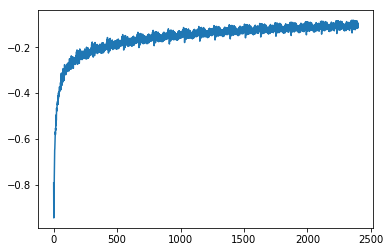

In [43]:
mnist_NN = FullyConnectedNetwork(layers)  #3x2 matrix
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, 
          test_labels, epochs, batch_size, learning_rate).sgd()

plt.plot(mnist_NN.delta_hist)

In [37]:
for a,b in layers:
    print(a,b)

784 200
200 100
100 10
